<a href="https://colab.research.google.com/github/LuchoValr/Semillero/blob/main/Prueba_series_luis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
#Pais, tipo de relacion, año y valor

##Exportaciones por pais

In [2]:
ex_p = pd.read_table('https://raw.githubusercontent.com/LuchoValr/Semillero/main/Datos/exportaciones%20por%20pais.txt')

In [3]:
exp_2 = ex_p.rename(columns={'Importadores':'Paises','Valor exportado en 2001':'2001','Valor exportado en 2002':'2002','Valor exportado en 2003':'2003','Valor exportado en 2004':'2004','Valor exportado en 2005':'2005','Valor exportado en 2006':'2006','Valor exportado en 2007':'2007','Valor exportado en 2008':'2008','Valor exportado en 2009':'2009','Valor exportado en 2010':'2010','Valor exportado en 2011':'2011','Valor exportado en 2012':'2012','Valor exportado en 2013':'2013','Valor exportado en 2014':'2014','Valor exportado en 2015':'2015','Valor exportado en 2016':'2016','Valor exportado en 2017':'2017','Valor exportado en 2018':'2018','Valor exportado en 2019':'2019','Valor exportado en 2020':'2020'})
exp_21=exp_2.insert(1, "Relacion", 'Importadores', allow_duplicates=False)
exp_3=exp_2.drop(['Unnamed: 21'],axis=1)
exp_4=pd.melt(exp_3, id_vars=['Paises','Relacion'], value_vars=['2001', '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']).reset_index()
exp_5=exp_4.drop(['index'],axis=1)
exp_5

,Paises,Relacion,variable,value
0,Mundo,Importadores,2001,12301486
1,Estados Unidos de América,Importadores,2001,5344533
2,China,Importadores,2001,19907
3,Panamá,Importadores,2001,265163
4,Ecuador,Importadores,2001,699929
...,...,...,...,...
4555,Timor-Leste,Importadores,2020,0
4556,Seychelles,Importadores,2020,0
4557,Sudán (antes de 2012),Importadores,2020,0
4558,Uzbekistán,Importadores,2020,0


##Importaciones por pais

In [4]:
im_p = pd.read_table('https://raw.githubusercontent.com/LuchoValr/Semillero/main/Datos/importaciones%20por%20pais.txt')

In [5]:
im_p2=im_p.rename(columns={'Exportadores':'Paises','Valor importado en 2001':'2001','Valor importado en 2002':'2002','Valor importado en 2003':'2003','Valor importado en 2004':'2004','Valor importado en 2005':'2005','Valor importado en 2006':'2006','Valor importado en 2007':'2007','Valor importado en 2008':'2008','Valor importado en 2009':'2009','Valor importado en 2010':'2010','Valor importado en 2011':'2011','Valor importado en 2012':'2012','Valor importado en 2013':'2013','Valor importado en 2014':'2014','Valor importado en 2015':'2015','Valor importado en 2016':'2016','Valor importado en 2017':'2017','Valor importado en 2018':'2018','Valor importado en 2019':'2019','Valor importado en 2020':'2020'})
imp_21=im_p2.insert(1, "Relacion", 'Exportadores', allow_duplicates=False)
imp_3=im_p2.drop(['Unnamed: 21'],axis=1)
imp_4=pd.melt(imp_3, id_vars=['Paises','Relacion'], value_vars=['2001', '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']).reset_index()
imp_5=imp_4.drop(['index'],axis=1)
imp_5

,Paises,Relacion,variable,value
0,Mundo,Exportadores,2001,12820352
1,Estados Unidos de América,Exportadores,2001,4442775
2,China,Exportadores,2001,475405
3,México,Exportadores,2001,596168
4,Brasil,Exportadores,2001,582060
...,...,...,...,...
4535,Islas Turks y Caicos,Exportadores,2020,0
4536,Burkina Faso,Exportadores,2020,0
4537,Samoa,Exportadores,2020,0
4538,Yemen,Exportadores,2020,0


In [6]:
mundo= pd.concat([exp_5, imp_5])
M1=mundo.rename(columns={'variable':'Años','value':'Valor'}).drop([0]).reset_index()
M1.drop(['index'],axis=1)


,Paises,Relacion,Años,Valor
0,Estados Unidos de América,Importadores,2001,5344533
1,China,Importadores,2001,19907
2,Panamá,Importadores,2001,265163
3,Ecuador,Importadores,2001,699929
4,Brasil,Importadores,2001,166704
...,...,...,...,...
9093,Islas Turks y Caicos,Exportadores,2020,0
9094,Burkina Faso,Exportadores,2020,0
9095,Samoa,Exportadores,2020,0
9096,Yemen,Exportadores,2020,0


HALLAR MISSING VALUES

In [7]:
M1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9098 entries, 0 to 9097
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     9098 non-null   int64 
 1   Paises    9098 non-null   object
 2   Relacion  9098 non-null   object
 3   Años      9098 non-null   object
 4   Valor     9098 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 355.5+ KB


FOLIUM

In [38]:
M2=M1[M1['Valor']!=0] 
M2

,index,Paises,Relacion,Años,Valor
0,1,Estados Unidos de América,Importadores,2001,5344533
1,2,China,Importadores,2001,19907
2,3,Panamá,Importadores,2001,265163
3,4,Ecuador,Importadores,2001,699929
4,5,Brasil,Importadores,2001,166704
...,...,...,...,...,...
9046,4488,Afganistán,Exportadores,2020,1
9047,4489,Angola,Exportadores,2020,1
9048,4490,Kuwait,Exportadores,2020,1
9049,4491,Malawi,Exportadores,2020,1


In [9]:
M2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7154 entries, 0 to 9050
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     7154 non-null   int64 
 1   Paises    7154 non-null   object
 2   Relacion  7154 non-null   object
 3   Años      7154 non-null   object
 4   Valor     7154 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 335.3+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


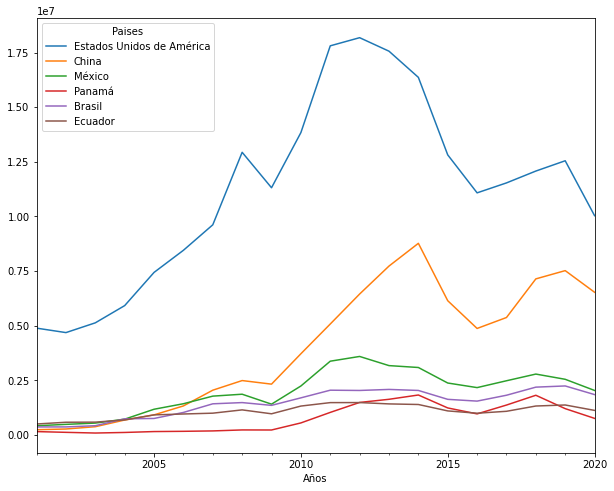

In [26]:
business_partners=M2[M2.Paises.isin(['Estados Unidos de América', 'China', 'México', 'Panamá','Brasil','Ecuador'])]
business_partners['Años'] = pd.to_datetime(business_partners['Años'])
business_partners2=business_partners.pivot_table(index='Años',columns='Paises',values='Valor')
st1 = business_partners2[['Estados Unidos de América','China','México','Panamá','Brasil','Ecuador']].plot(figsize=(10, 8))
st1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


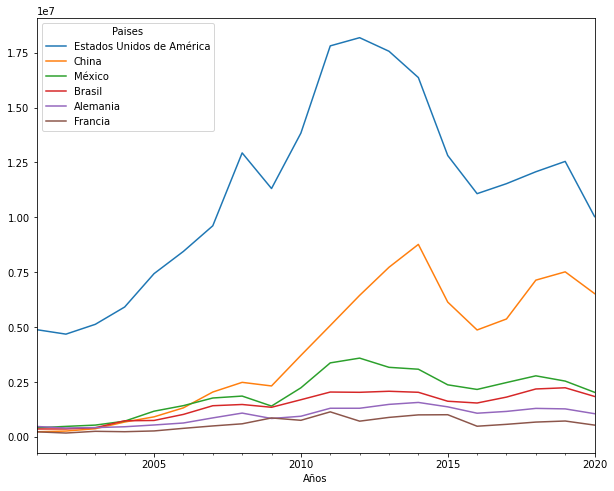

In [27]:
expo_partners=M2[M2.Paises.isin(['Estados Unidos de América', 'China', 'México', 'Brasil','Alemania','Francia'])]
expo_partners['Años'] = pd.to_datetime(expo_partners['Años'])
expo_partners2=expo_partners.pivot_table(index='Años',columns='Paises',values='Valor')
st2 = expo_partners2[['Estados Unidos de América','China','México','Brasil','Alemania','Francia']].plot(figsize=(10, 8))
st2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


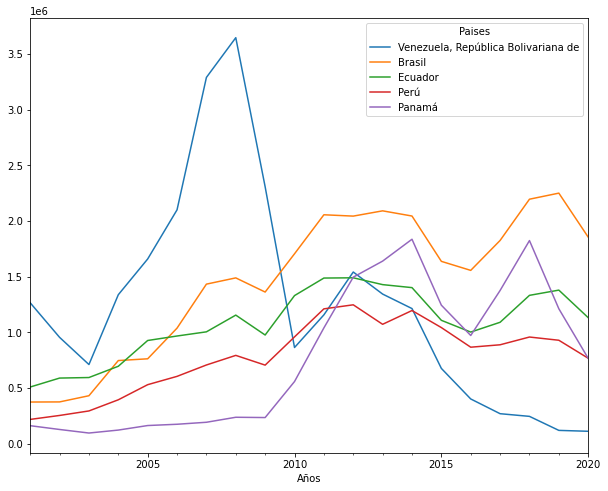

In [37]:
frontier_partners=M2[M2.Paises.isin(['Venezuela, República Bolivariana de', 'Brasil', 'Ecuador', 'Perú','Panamá'])]
frontier_partners['Años'] = pd.to_datetime(frontier_partners['Años'])
frontier_partners2=frontier_partners.pivot_table(index='Años',columns='Paises',values='Valor')
st3 = frontier_partners2[['Venezuela, República Bolivariana de','Brasil','Ecuador','Perú','Panamá']].plot(figsize=(10, 8))
st3